#### IMPORTING THE LIBRARYS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split 
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#### LOADING THE DATA

In [2]:
df_bc=pd.read_csv("bc.csv") 
df_bc=df_bc.sample(frac=1)
df_bc

,--Control,1949_at,31397_at,31418_at,31420_at,31423_at,31430_at,31456_at,31588_at,31655_at,...,ZSCAN9,ZSWIM8,ZSWIM8-AS1,ZW10,ZWINT,ZXDB,ZYX,ZZEF1,ZZZ3,target
18,441.479,9.826,37.612,136.070,9.627,112.414,5.898,10.374,49.581,447.989,...,41.458,807.357,89.636,16.185,88.071,7.843,214.644,78.185,400.133,docetaxel sensitive tumor
6,856.824,11.647,26.802,132.972,32.803,318.081,5.898,21.691,77.137,309.116,...,34.655,934.118,129.955,7.971,782.144,14.506,46.953,38.178,334.116,docetaxel resistant tumor
20,481.638,5.898,18.388,106.423,5.898,202.605,14.774,5.898,47.443,605.373,...,73.140,641.094,73.298,20.377,103.556,10.514,143.212,36.266,531.861,docetaxel sensitive tumor
13,602.149,5.898,15.750,171.559,20.296,190.520,9.681,23.031,94.402,365.641,...,23.545,1043.980,108.564,9.131,404.443,14.637,50.276,29.732,208.959,docetaxel resistant tumor
3,553.825,17.306,30.746,162.779,33.528,149.981,24.833,5.898,115.181,25.593,...,26.973,1165.100,153.670,5.898,167.653,30.782,176.692,31.044,139.519,docetaxel resistant tumor
15,434.991,17.590,56.640,98.195,14.613,79.093,16.617,5.898,88.805,565.160,...,30.774,906.287,94.483,7.796,673.391,9.519,397.493,42.354,483.864,docetaxel sensitive tumor
19,555.931,6.686,16.583,100.592,24.067,196.904,10.380,9.383,94.356,230.441,...,19.790,1575.850,111.285,6.540,423.747,7.351,189.430,38.037,642.108,docetaxel sensitive tumor
9,547.932,6.349,24.588,155.837,19.860,137.418,14.748,5.898,64.293,429.854,...,18.749,1000.350,124.477,9.853,90.077,12.346,419.700,57.323,409.801,docetaxel resistant tumor
0,850.384,12.003,38.887,138.804,24.600,313.709,25.422,5.898,95.546,48.030,...,61.238,893.673,159.588,5.898,225.341,21.405,223.523,67.028,177.656,docetaxel resistant tumor
16,543.119,10.261,32.490,102.310,12.013,105.533,13.564,13.142,61.668,380.579,...,55.895,1240.970,116.146,8.944,454.702,10.584,322.487,71.625,555.723,docetaxel sensitive tumor


#### PREPARING DATA

In [3]:
#sns.scatterplot(data=df_bc) 
#sns.pairplot(data=df_bc,hue="target",kind="scatter")  
target=df_bc["target"].array
df_features=df_bc.drop(columns=["target"]) 

aux=[] 
for t in target: 
    if t == 'docetaxel resistant tumor' : 
        aux.append(0) 
    elif t== 'docetaxel sensitive tumor': 
        aux.append(1) 
if len(aux) != 0 :
    target=aux 

df_bc["target"]=target  
X=df_features.values  
y=target     

here we separate the desired value into one array called target and all the features in another array

#### VISUALIZING DATA

c:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


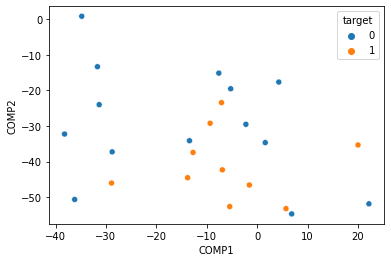

In [4]:
tsne=TSNE(n_components=2,random_state=200) #we apply the random state so that its not different everytime we restart  

array_red=tsne.fit_transform(X) #applying dimensional reductioon on array  

df_tsne=pd.DataFrame(array_red,columns=['COMP1','COMP2']) # making it into a pandas dataframe for easier viewing 

df_tsne['target']=target 

df_tsne 

sns.scatterplot(data=df_tsne,x="COMP1",y="COMP2",hue="target") 
plt.show()

#### TRAINING MODEL(old way)

In [35]:
def getModel():
    #return LogisticRegression()
    #return RandomForestClassifier()
    return KNeighborsClassifier() 


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = getModel().fit(X_train,y_train)

score = model.score(X_test, y_test) 

print('accuracy =', score)  

accuracy = 0.8


#### TRAINING MODEL(USING CROSS VALIDATION)

In [37]:
scores = cross_val_score(getModel(),X,y,cv=10)

print('accuracy cv = ',np.mean(scores)) 
scores

accuracy cv =  0.7833333333333333


array([1.        , 0.66666667, 1.        , 0.66666667, 1.        ,
       0.5       , 1.        , 0.5       , 1.        , 0.5       ])

#### VISUALIZING CONFUSION MATRIX

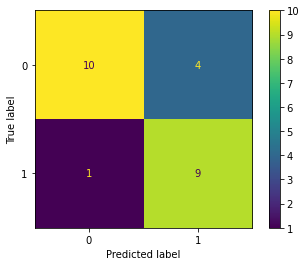

In [48]:
y_pred = cross_val_predict(getModel(),X,y,cv=10)

cm = confusion_matrix(y,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)

disp.plot()

plt.show() 
